In [1]:
import pandas as pd

In [2]:
import numpy as np
from pprint import pprint

In [3]:
dataset = pd.read_csv('zoo_data.csv')
'''names=['hair','feathers','eggs','milk',
        'airbone','aquatic','predator','toothed','backbone',
        'breathes','venomous','fins','legs','tail','domestic','catsize','class',])'''

"names=['hair','feathers','eggs','milk',\n        'airbone','aquatic','predator','toothed','backbone',\n        'breathes','venomous','fins','legs','tail','domestic','catsize','class',])"

In [4]:
dataset

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

The prediction accuracy is:  80.0 %

Confusion matrix: 
 [[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 2 1]]

 Classification Report:
                precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.80        20
   macro avg       0.69      0.76      0.67        20
weighted avg       0.78      0.80      0.75        20
 





/home/root1/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(0, 0.5, 'Mammals'),
 Text(0, 1.5, 'Fish'),
 Text(0, 2.5, 'Birds'),
 Text(0, 3.5, 'Molluscs'),
 Text(0, 4.5, 'Insects'),
 Text(0, 5.5, 'Amphibians'),
 Text(0, 6.5, 'Reptiles')]

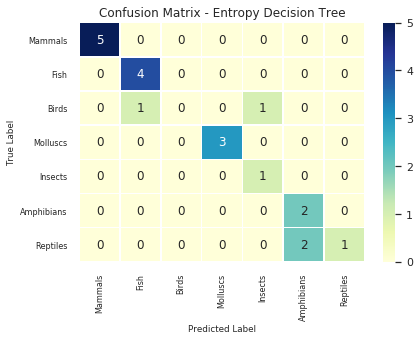

<Figure size 460.8x316.8 with 0 Axes>

In [12]:
entree = DecisionTreeClassifier(criterion = 'entropy')
entree.fit(train_features,train_targets)
prediction = entree.predict(test_features)
labels = ["Mammals", "Fish", "Birds", "Molluscs", "Insects", "Amphibians", "Reptiles"]
print("The prediction accuracy is: ",entree.score(test_features,test_targets)*100,"%")

print("\nConfusion matrix: \n", confusion_matrix(test_targets, prediction))

print("\n Classification Report:\n ", classification_report(test_targets, prediction),"\n\n\n")

import seaborn as sns

cm = confusion_matrix(test_targets, prediction)
matrix_df = pd.DataFrame(cm)

import matplotlib.pyplot as plt

ax = plt.subplot(111)
sns.set(font_scale=1)
plt.figure()
sns.heatmap(matrix_df, annot=True, fmt="d", ax=ax, cmap="YlGnBu", linewidths=0.5)

ax.set_title('Confusion Matrix - Entropy Decision Tree')
ax.set_xlabel("Predicted Label")
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("True Label")
ax.set_yticklabels(list(labels), rotation=0)

Accuracy for gini is:  80.0 %

Confusion matrix: 
 [[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 2 1]]

 Classification Report:
                precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.80        20
   macro avg       0.69      0.76      0.67        20
weighted avg       0.82      0.80      0.77        20



/home/root1/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(0, 0.5, 'Mammals'),
 Text(0, 1.5, 'Fish'),
 Text(0, 2.5, 'Birds'),
 Text(0, 3.5, 'Molluscs'),
 Text(0, 4.5, 'Insects'),
 Text(0, 5.5, 'Amphibians'),
 Text(0, 6.5, 'Reptiles')]

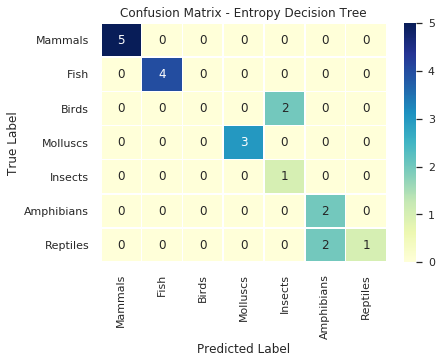

<Figure size 460.8x316.8 with 0 Axes>

In [13]:
#NOW GINI INDEX

ginitree = DecisionTreeClassifier(criterion = 'gini')
ginitree.fit(train_features, train_targets)
prediction = ginitree.predict(test_features)
print("Accuracy for gini is: ", ginitree.score(test_features, test_targets)*100, "%")

print("\nConfusion matrix: \n", confusion_matrix(test_targets, prediction))

print("\n Classification Report:\n ", classification_report(test_targets, prediction))

cm = confusion_matrix(test_targets, prediction)
matrix_df = pd.DataFrame(cm)

ax = plt.subplot(111)
sns.set(font_scale=1)
plt.figure()
sns.heatmap(matrix_df, annot=True, fmt="d", ax=ax, cmap="YlGnBu", linewidths=0.5)

ax.set_title('Confusion Matrix - Entropy Decision Tree')
ax.set_xlabel("Predicted Label")
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("True Label")
ax.set_yticklabels(list(labels), rotation=0)

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

#plt.style.available

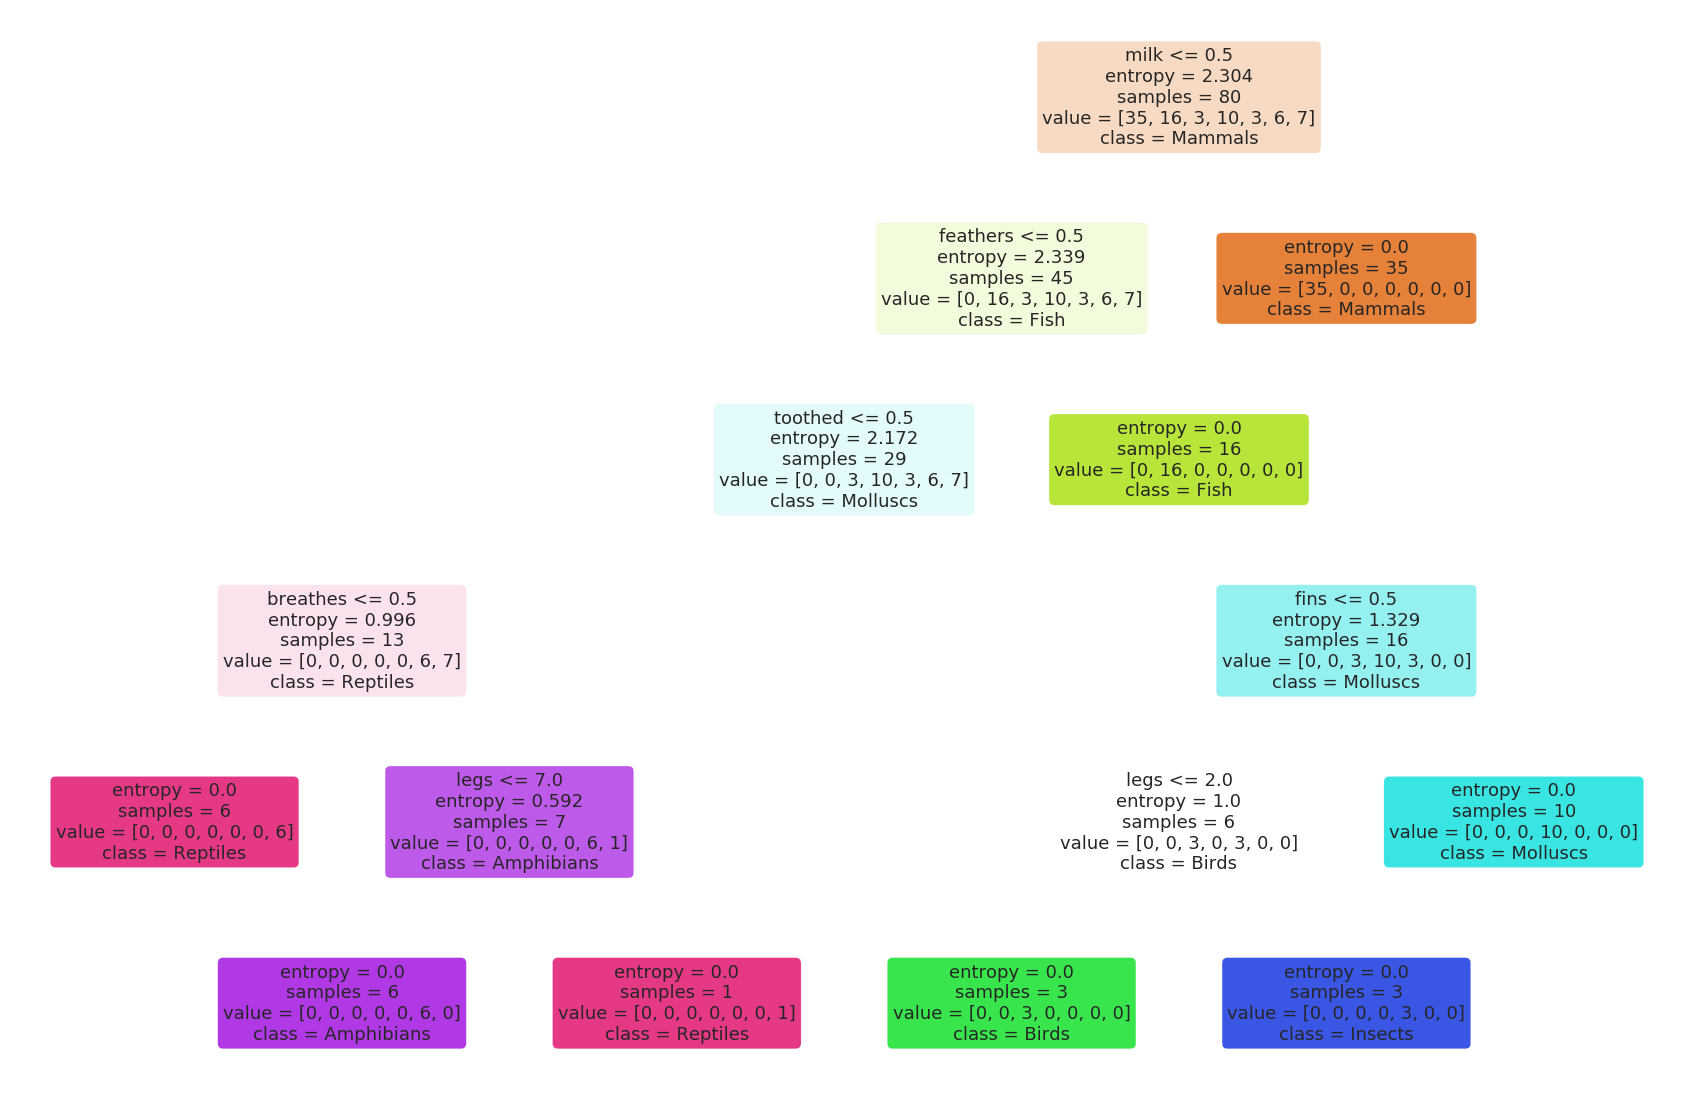

In [10]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(30,20))

feature_names = ['hair','feathers','eggs','milk',
        'airbone','aquatic','predator','toothed','backbone',
        'breathes','venomous','fins','legs','tail','domestic','catsize']

labels = dataset.iloc[:,-1].unique()
labels = ["Mammals", "Fish", "Birds", "Molluscs", "Insects", "Amphibians", "Reptiles"]
a = tree.plot_tree(entree, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=18)

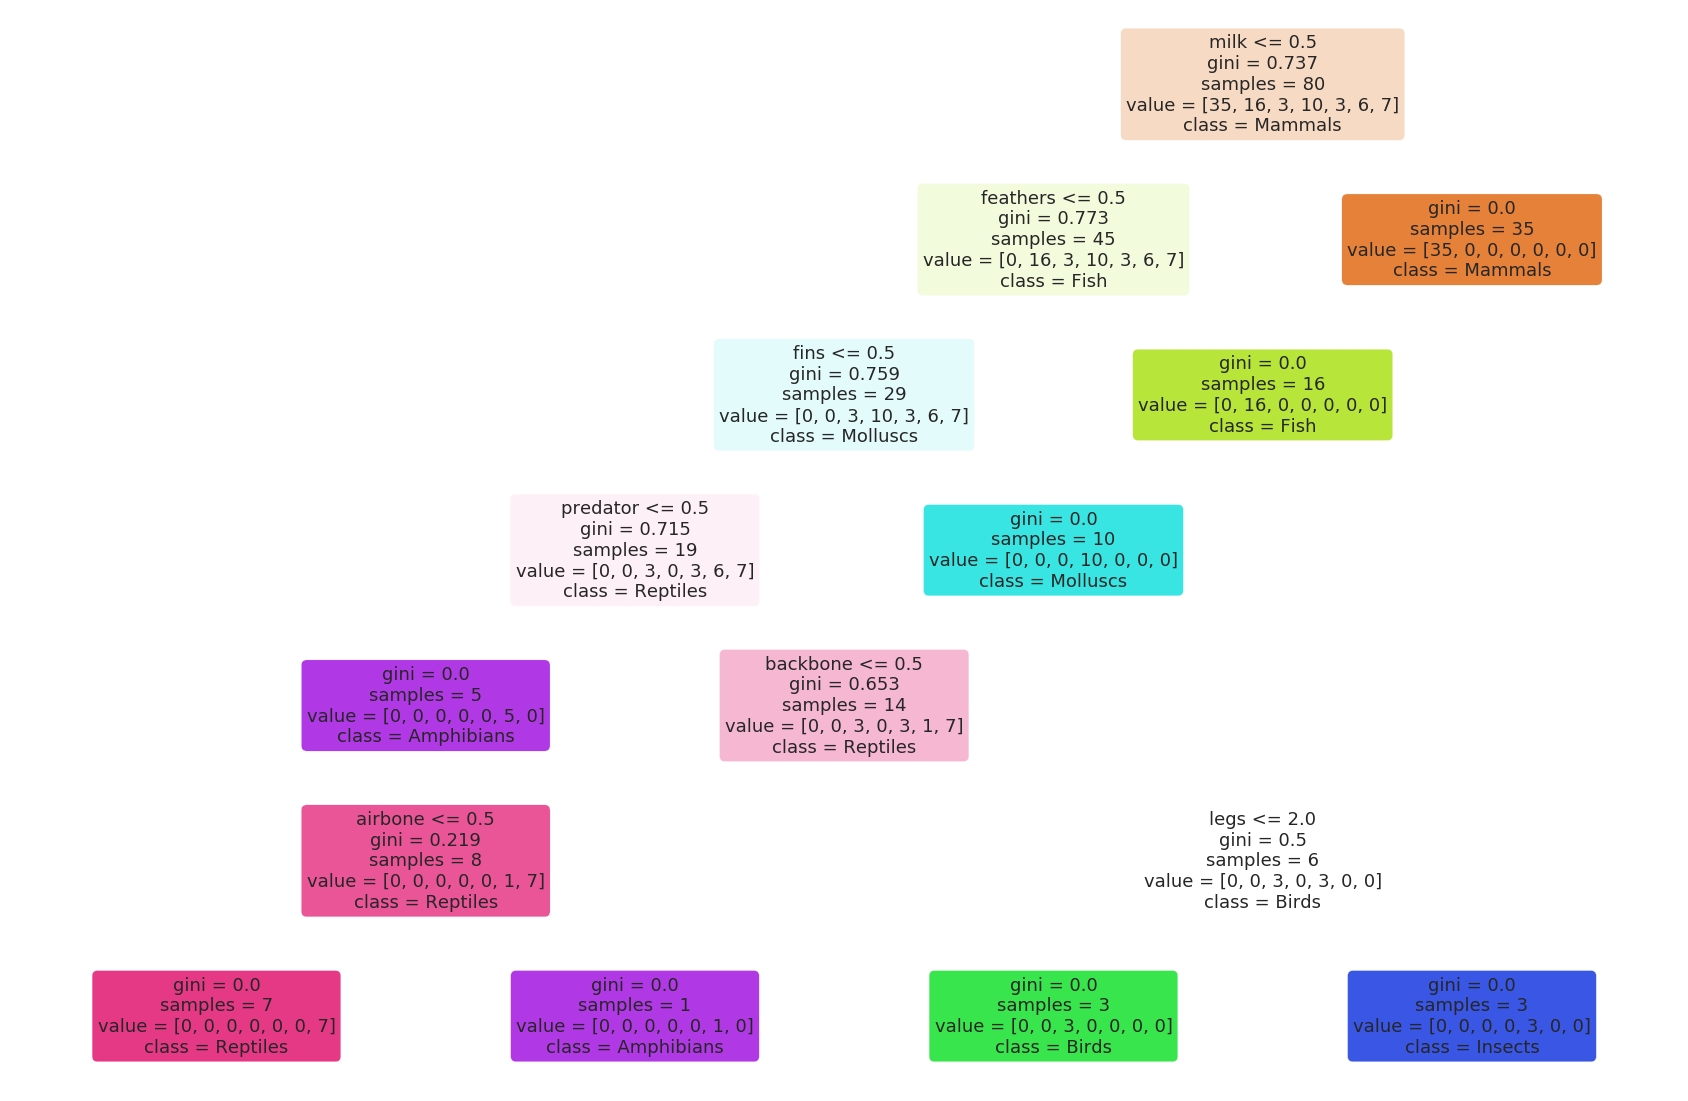

In [11]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(30,20))

a = tree.plot_tree(ginitree, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=18)